# 1. 파일불러오기

In [31]:
import pandas as pd
import numpy as np

In [32]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False  # minus 표시
plt.rc('font', family='Malgun Gothic')

In [33]:
file_path = './resources/완_기간별_일별_170101_to_230509_ver1.csv'
mv_2017 = pd.read_csv(file_path)
mv_2017.head()

,순위,영화명,개봉일,대표국적,국적,제작사,배급사,등급,장르,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,1,너의 이름은.,2017-01-04 00:00:00,일본,일본,NaN,플러스엠 엔터테인먼트,12세이상관람가,"애니메이션,드라마,멜로/로맨스",신카이 마코토,"카미키 류노스케,카미시라이시 모네,나가사와 마사미,이치하라 에수코,유키 아오이,시마...",2017-01-08,2809088900,9745292442,333008,1182465,947,4101
1,3,모아나,2017-01-12 00:00:00,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,전체관람가,애니메이션,"론 클레멘츠,존 머스커","드웨인 존슨,아우이 크라발호,알란 터딕,제메인 클레멘트,테무에라 모리슨",2017-01-08,7738000,9712000,910,1192,6,6
2,4,패신저스,2017-01-04 00:00:00,미국,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),12세이상관람가,"어드벤처,SF",모튼 틸덤,"크리스 프랫,제니퍼 로렌스,마이클 쉰,앤디 가르시아,로렌스 피쉬번",2017-01-08,1107502600,4176443418,129810,504393,608,2272
3,5,얼라이드,2017-01-11 00:00:00,미국,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,"스릴러,드라마,멜로/로맨스",로버트 저메키스,"브래드 피트,마리옹 꼬띠아르,리지 캐플란,매튜 구드,자레드 해리스",2017-01-08,0,32151000,0,3730,0,0
4,6,어쌔신 크리드,2017-01-11 00:00:00,미국,"미국,영국,프랑스",NaN,이십세기폭스코리아(주),15세이상관람가,"액션,어드벤처,판타지,SF",저스틴 커젤,"마이클 패스벤더,마리옹 꼬띠아르,아리안 라베드,제레미 아이언스,브렌단 글리슨,마이클...",2017-01-08,0,8289000,0,790,0,0


# 2.연도별 선호장르

In [35]:
mv_2017['기준일'] = pd.to_datetime(mv_2017['기준일'],format='%Y-%m-%d')

In [36]:
mv_last_date = mv_2017.loc[mv_2017.groupby(['영화명'])['기준일'].idxmax()]
mv_last_date.head()

,순위,영화명,개봉일,대표국적,국적,제작사,배급사,등급,장르,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
214519,66,#살아있다,2020-06-24 00:00:00,한국,한국,"영화사 집,(주)퍼스펙티브픽쳐스",롯데컬처웍스(주)롯데엔터테인먼트,15세이상관람가,드라마,조일형,"유아인,박신혜,전배수,고나영,권용채,김경태,김다영,김단비,김라희,김미래,김미래,김윤...",2020-10-31,0,15968219900,0,1903992,0,0
233388,115,#아이엠히어,2021-01-14 00:00:00,프랑스,프랑스,NaN,(주)넥스트엔터테인먼트월드(NEW),12세이상관람가,"멜로/로맨스,코미디",에릭 라티고,"알랭 샤바,배두나,이명자,선종남,김자금,강현중,정윤하,송경의,엄지만,남승화,이지민,...",2021-02-13,0,136875710,0,16404,0,0
337590,134,#위왓치유,2021-06-03 00:00:00,기타,기타,NaN,찬란,청소년관람불가,다큐멘터리,"바르보라 차르포바,비트 클루삭",NaN,2022-11-26,0,16759950,0,1908,0,0
310827,84,#해시태그,2022-06-01 00:00:00,한국,한국,(주)더존크리에이티브,(주)더존크리에이티브,12세이상관람가,공연,이상식,NaN,2022-06-11,0,2205600,0,173,0,0
134060,175,0.0MHz,2019-05-29 00:00:00,한국,한국,(주)제이엠컬쳐스,(주)스마일이엔티,15세이상관람가,공포(호러),유선동,"정은지,이성열,최윤영,신주환,정원창,박명신,남관효,박대희,노혜영,서진석,김대현,신승...",2019-06-29,0,1088258860,0,137294,0,0


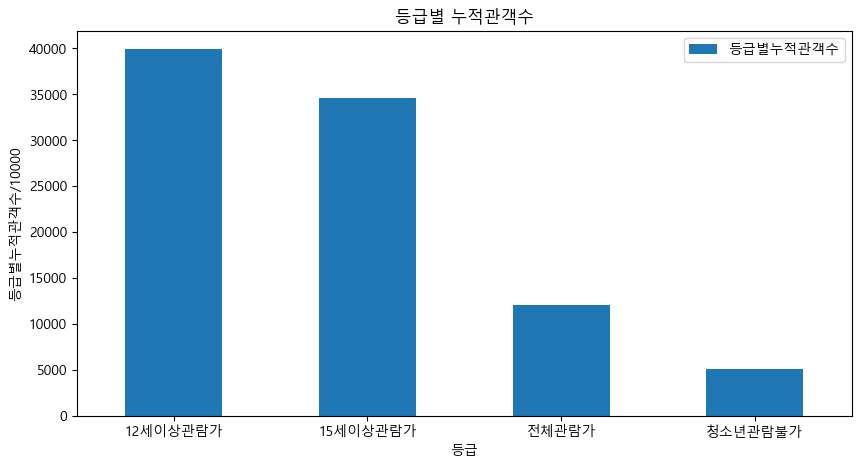

In [30]:
mv_rate_moviegoer = mv_last_date.groupby('등급')['누적관객수'].sum().reset_index(name='등급별누적관객수')
mv_rate_moviegoer = mv_rate_moviegoer.sort_values(by='등급별누적관객수', ascending=False)[:4]

mv_rate_moviegoer_div = mv_rate_moviegoer[:]
mv_rate_moviegoer_div['등급별누적관객수'] = mv_rate_moviegoer_div['등급별누적관객수']/10000
mv_rate_moviegoer_div.plot.bar(x='등급', y='등급별누적관객수', rot=0, figsize=(10, 5), fontsize=10)
plt.title('등급별 누적관객수')
plt.ylabel('등급별누적관객수/10000')
plt.show()